In [1]:
import pandas as pd
df = pd.read_csv('../Datasets/diabetes_two.csv')

<h1><b><font color="lime">Outlier finding and removing</b></h1>

<font color="yellow">
(i) Finding from figure

In [3]:
# import matplotlib.pyplot as plt
import seaborn as sns

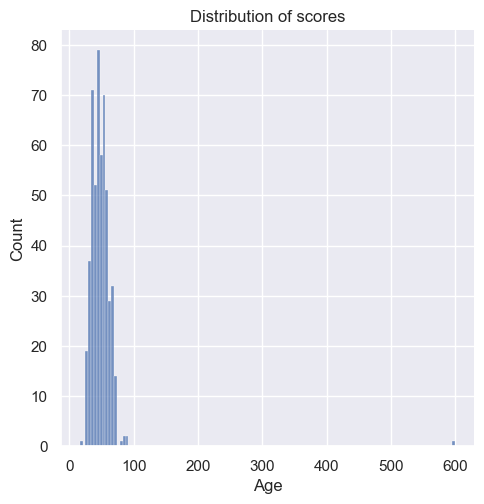

In [14]:
sns.set_theme(color_codes=True, context='notebook', style='darkgrid')
sns.displot(data=df['Age']).set(title='Distribution of scores', xlabel='Age')

<font color="yellow">
(ii) Statistical Approach

In [16]:
df.describe() #find unnatural value from the stats
#for numerical data

,Age
count,519.000000
mean,49.082852
std,27.104027
min,16.000000
25%,39.000000
50%,48.000000
75%,57.000000
max,600.000000


<font color="yellow">
(iii) By finding z-score approach [-3,3]
</font><br>
any value outside of [-3,3] is an outlier


In [17]:
#calculate z-score for 'Age' column
z_score = (df['Age']-df['Age'].mean()) / df['Age'].std()
z_score

0      -0.335111
1       0.328997
2            NaN
3      -0.150636
4      20.326026
         ...    
515    -0.372006
516    -0.039952
517     0.328997
518    -0.630270
519    -0.261321
Name: Age, Length: 520, dtype: float64

In [22]:
# finding outliers
for x in z_score:
    if (x<-3 or x>3):
        print("There's a outlier", x)
    else:
        continue

There's a outlier 20.3260259687286


In [23]:
#finding index of the outlier
index = z_score.index[z_score == 20.3260259687286][0]
index

4

In [24]:
#value in the outlier index
df['Age'][4]

600.0

In [25]:
# now, handle the outlier (here, using mean)
#replacing the outlier with the mean value
df['Age'][4] = df['Age'].mean()

C:\Users\almah\AppData\Local\Temp\ipykernel_21492\660450727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][4] = df['Age'].mean()


In [26]:
#new value in the outlier index
df['Age'][4]

49.08285163776493